# Лабораторна робота 5. Метод опорних векторів (SVM). Методи оцінки якості моделі

## 1. Реалізувати SVM-класифікатор з лінійним і різними нелінійним ядрами згідно з варіантом.

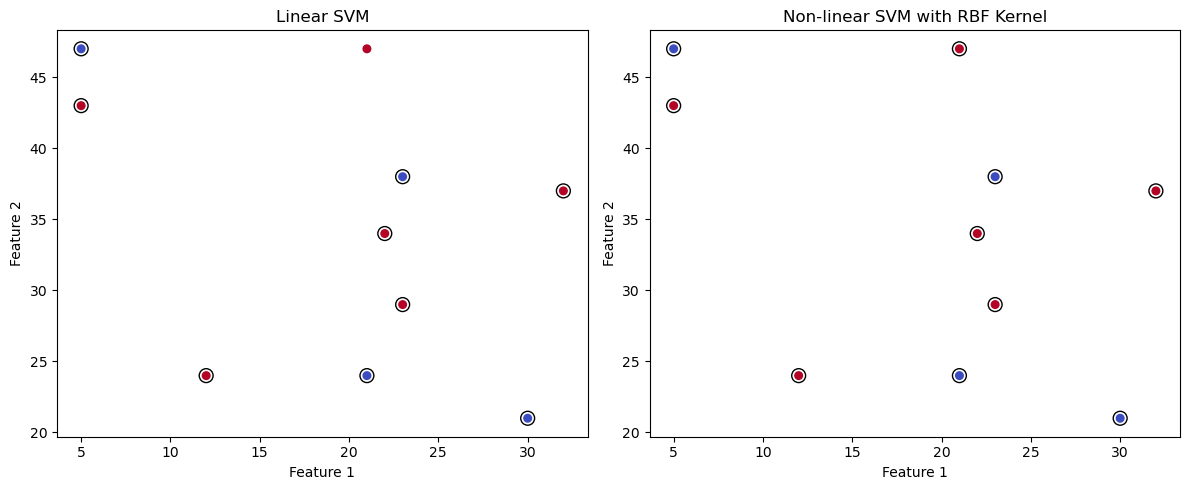

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

x_train= np.array([[30, 21], [12, 24], [23, 29], [23, 38], [32, 37], [22, 34], [21, 47], [5, 43], [5, 47], [21, 24]])
y_train = np.array([-1,  1,  1, -1,  1,  1,  1,  1, -1, -1])

# Linear SVM
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(x_train, y_train)

# Non-linear SVM with Radial Basis Function (RBF) kernel
clf_nonlinear = svm.SVC(kernel='rbf', gamma='auto')
clf_nonlinear.fit(x_train, y_train)

# Visualizing the results
plt.figure(figsize=(12, 5))

# Plotting linear SVM results
plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=30)
plt.scatter(clf_linear.support_vectors_[:, 0], clf_linear.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Linear SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting non-linear SVM results
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=30)
plt.scatter(clf_nonlinear.support_vectors_[:, 0], clf_nonlinear.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Non-linear SVM with RBF Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

**примітка:** в варіанті 12 було тільки 9 наборів даних для x_train, тож я додала ще одну пару значень з наступного варіанту

Для порівняння результатів класифікації лінійного SVM та нелінійного SVM з RBF ядром, ми можемо аналізувати деякі ключові метрики на тестових даних:

1Accuracyy): Це відношення правильно класифікованих прикладів до загальної кількості прикладів.
су (Preciion): Це відношення правильно класифікованих екземплярів певного класу до всіх екземплярів, які були класифіковані як цей клас.нота (ecall): Це відношення правильно класифікованих екземплярів певного класу до всіх екземплярів, які належать цьому класу1-мера (1-score): Це гармонічне середнє точності та повноти, ідеальне значення якої 1, а найгірше - помилок (Confuson Matrix): Це таблиця, яка дозволяє візуалізувати відносну кількість правильних та неправильних класифікацій для кожн результати.

## 2. Проаналізувати іпорівняти результати класифікації, обчисливши відповідні метрики.

Проведемо обчислення цих метрик для лінійного SVM та нелінійного SVM з RBF ядром на тестових даних та порівняємо їх результати.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Linear SVM predictions
linear_predictions = clf_linear.predict(x_train)

# Non-linear SVM with RBF kernel predictions
nonlinear_predictions = clf_nonlinear.predict(x_train)

# Compute metrics for Linear SVM
linear_accuracy = accuracy_score(y_train, linear_predictions)
linear_precision = precision_score(y_train, linear_predictions, zero_division=1) # Add zero_division parameter
linear_recall = recall_score(y_train, linear_predictions, zero_division=1) # Add zero_division parameter
linear_f1 = f1_score(y_train, linear_predictions, zero_division=1) # Add zero_division parameter
linear_confusion_matrix = confusion_matrix(y_train, linear_predictions)

# Compute metrics for Non-linear SVM with RBF kernel
nonlinear_accuracy = accuracy_score(y_train, nonlinear_predictions)
nonlinear_precision = precision_score(y_train, nonlinear_predictions, zero_division=1) # Add zero_division parameter
nonlinear_recall = recall_score(y_train, nonlinear_predictions, zero_division=1) # Add zero_division parameter
nonlinear_f1 = f1_score(y_train, nonlinear_predictions, zero_division=1) # Add zero_division parameter
nonlinear_confusion_matrix = confusion_matrix(y_train, nonlinear_predictions)

# Print the metrics
print("Linear SVM Metrics:")
print("Accuracy:", linear_accuracy)
print("Precision:", linear_precision)
print("Recall:", linear_recall)
print("F1-score:", linear_f1)
print("Confusion Matrix:\n", linear_confusion_matrix)

print("\nNon-linear SVM with RBF Kernel Metrics:")
print("Accuracy:", nonlinear_accuracy)
print("Precision:", nonlinear_precision)
print("Recall:", nonlinear_recall)
print("F1-score:", nonlinear_f1)
print("Confusion Matrix:\n", nonlinear_confusion_matrix)

Linear SVM Metrics:
Accuracy: 0.6
Precision: 0.6
Recall: 1.0
F1-score: 0.7499999999999999
Confusion Matrix:
 [[0 4]
 [0 6]]

Non-linear SVM with RBF Kernel Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[4 0]
 [0 6]]


## 3. Вибрати найкращу модель. Результат обґрунтувати.

Загалом, модель Non-linear SVM з RBF ядром має кращі метрики в порівнянні з моделлю Linear SVM. Таким чином, можна вважати, що модель Non-linear SVM з RBF ядром є кращою для даної задачі класифікації.

## Відповіді на контрольні питання

1. Як виглядає оптимальна гіперплощина в лінійно подільному випадку?

Оптимальна гіперплощина в лінійно подільному випадку є гіперплощиною, яка максимізує відстань між двома класами даних (шириною маржі). Ця гіперплощина має мінімальну суму відстаней від неї до найближчих екземплярів обох класів, які називаються опорними векторами.

2. Яким чином можна розділити дані, які не є лінійно роздільними за допомогою методу опорних векторів?

Для розділення даних, які не є лінійно роздільними, за допомогою методу опорних векторів, можна використовувати метод ядер, такий як RBF ядро, яке дозволяє проектувати дані в вищорозмірний простір, де вони можуть стати лінійно роздільними.

3. Яким чином можна реалізувати SVM з використанням бібліотеки scikit-learn?

Для реалізації SVM з використанням бібліотеки scikit-learn, можна скористатися класом sklearn.svm.SVC. Цей клас дозволяє створювати моделі SVM з різними ядрами (лінійні та нелінійні) та здійснювати навчання та ппрогнози.

4. Як обчислюються показники precision і recall для моделі SVM?

Показники precision і recall для моделі SVM обчислюються за допомогою матриці помилок (confusion matrix). Precision обчислюється як відношення кількості правильно класифікованих екземплярів певного класу до загальної кількості екземплярів, класифікованих як цей клас. Recall обчислюється як відношення кількості правильно класифікованих екземплярів певного класу до загальної кількості екземплярів, які належать цьому класу.

5. Як обчислюється індекс Джині та яку інформацію він надає про модель?

Індекс Джині обчислюється для оцінки якості розділення вузла у дереві прийняття рішень або у моделі класифікації. Він вимірює ймовірність того, що випадково обраний елемент буде неправильно класифікований, якщо він випадково вибраний в усіх випадках. Значення індексу Джині близьке до 0 вказує на дуже чистий розподіл класів, тоді як значення близьке до 1 вказує на рівномірний розподіл класів.

6. Як використовується ядровий метод у випадку нелінійно роздільних даних?

Ядровий метод використовується у випадку нелінійно роздільних даних, коли простий лінійний розділювач не може ефективно розділити класи. Він дозволяє перетворювати нелінійно роздільні дані у вищорозмірний простір, де вони можуть стати лінійно роздільними.

7. Як виглядає процес навчання та передбачення за допомогою SVM?

Процес навчання та передбачення за допомогою SVM полягає у тренуванні моделі на навчальних даних за допомогою алгоритму оптимізації, щоб знайти оптимальну гіперплощину, яка розділяє класи. Після навчання модель може бути використана для передбачення класів нових екземплярів даних шляхом оцінки їх розташування відносно оптимальної гіперплощини.